In [30]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
aps_train = pd.read_csv('/Users/phuongqn/Desktop/INF552/Homework/Homework 4 Data/aps_failure_training_set.csv',
                       skiprows = 20)
aps_test = pd.read_csv('/Users/phuongqn/Desktop/INF552/Homework/Homework 4 Data/aps_failure_test_set.csv',
                       skiprows = 20)
aps_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
5,neg,174,na,26,24,0,0,na,na,na,...,na,na,na,na,na,na,na,na,0,0
6,neg,40202,na,640,606,0,0,0,0,0,...,526218,239734,439556,374248,169096,53658,41054,320,0,0
7,neg,120278,na,2130706432,256,0,0,0,0,0,...,1006722,459658,876356,689532,568540,500624,1006628,34820,0,0
8,neg,14592,0,2130706438,162,0,0,0,0,0,...,105024,57398,49152,38256,243268,145144,0,0,0,0
9,neg,28338,na,2130706432,238,0,0,0,0,0,...,357006,150056,264776,239282,140548,74750,32958,84,0,0


In [17]:
aps_train.replace('na', np.NaN, inplace = True)
aps_test.replace('na', np.NaN, inplace = True)

In [18]:
aps_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,NaN,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,NaN,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,NaN,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,NaN,0,NaN,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,NaN,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [20]:
y_train = aps_train.pop('class')
X_train = aps_train

y_test = aps_test.pop('class')
X_test = aps_test
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,38312,NaN,2130706432,218,0,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,14,0,6,NaN,0,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,102960,NaN,2130706432,116,0,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,78696,NaN,0,NaN,0,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,153204,0,182,NaN,0,0,0,0,0,11804,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [24]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_tr = mean_imputer.fit_transform(X_train)        
i_X_train= pd.DataFrame(imputed_tr, columns=X_train.columns)  

imputed_t = mean_imputer.fit_transform(X_test)        
i_X_test= pd.DataFrame(imputed_t, columns=X_test.columns)  
i_X_test


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.000000,2.000000e+01,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.682000e+03,...,1.098000e+03,1.380000e+02,4.120000e+02,6.540000e+02,7.800000e+01,8.800000e+01,0.000000e+00,0.000000,0.000000,0.000000
1,82.0,0.000000,6.800000e+01,40.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.068000e+03,2.760000e+02,1.620000e+03,1.160000e+02,8.600000e+01,4.620000e+02,0.000000e+00,0.000000,0.000000,0.000000
2,66002.0,2.000000,2.120000e+02,112.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.994860e+05,...,4.950760e+05,3.803680e+05,4.401340e+05,2.695560e+05,1.315022e+06,1.536800e+05,5.160000e+02,0.000000,0.000000,0.000000
3,59816.0,0.772065,1.010000e+03,936.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.408200e+05,2.432700e+05,4.833020e+05,4.853320e+05,4.313760e+05,2.100740e+05,2.816620e+05,3232.000000,0.000000,0.000000
4,1814.0,0.772065,1.560000e+02,140.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,7.646000e+03,4.144000e+03,1.846600e+04,4.978200e+04,3.176000e+03,4.820000e+02,7.600000e+01,0.000000,0.000000,0.000000
5,174.0,0.772065,2.600000e+01,24.000000,0.000000,0.00000,120.858516,2064.203656,13792.360509,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8560.354884,0.000000,0.000000
6,40202.0,0.772065,6.400000e+02,606.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,5.262180e+05,2.397340e+05,4.395560e+05,3.742480e+05,1.690960e+05,5.365800e+04,4.105400e+04,320.000000,0.000000,0.000000
7,120278.0,0.772065,2.130706e+09,256.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.006722e+06,4.596580e+05,8.763560e+05,6.895320e+05,5.685400e+05,5.006240e+05,1.006628e+06,34820.000000,0.000000,0.000000
8,14592.0,0.000000,2.130706e+09,162.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,1.050240e+05,5.739800e+04,4.915200e+04,3.825600e+04,2.432680e+05,1.451440e+05,0.000000e+00,0.000000,0.000000,0.000000
9,28338.0,0.772065,2.130706e+09,238.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,...,3.570060e+05,1.500560e+05,2.647760e+05,2.392820e+05,1.405480e+05,7.475000e+04,3.295800e+04,84.000000,0.000000,0.000000


In [27]:
train_CV = i_X_train.std()/i_X_train.mean()
train_CV

aa_000      2.450938
ab_000      2.328400
ac_000      2.169767
ad_000    183.847620
ae_000     23.190937
af_000     18.658921
ag_000     91.878565
ag_001     34.854950
ag_002     17.369143
ag_003      8.550049
ag_004      5.401479
ag_005      2.927092
ag_006      2.344927
ag_007      2.833484
ag_008      6.154583
ag_009     32.984351
ah_000      2.300187
ai_000     18.012682
aj_000     43.801822
ak_000     74.526688
al_000      9.074371
am_0        9.058672
an_000      2.238797
ao_000      2.260149
ap_000      3.059164
aq_000      2.839612
ar_000     10.837050
as_000     86.416904
at_000     23.459425
au_000     68.160554
             ...    
dl_000     37.083676
dm_000     33.837616
dn_000      2.867795
do_000      2.099355
dp_000      1.959394
dq_000     21.028171
dr_000      6.550216
ds_000      2.268866
dt_000      2.143945
du_000      2.784611
dv_000      3.427094
dx_000      5.126012
dy_000      7.439768
dz_000     49.002158
ea_000     33.359880
eb_000      4.249694
ec_00       2

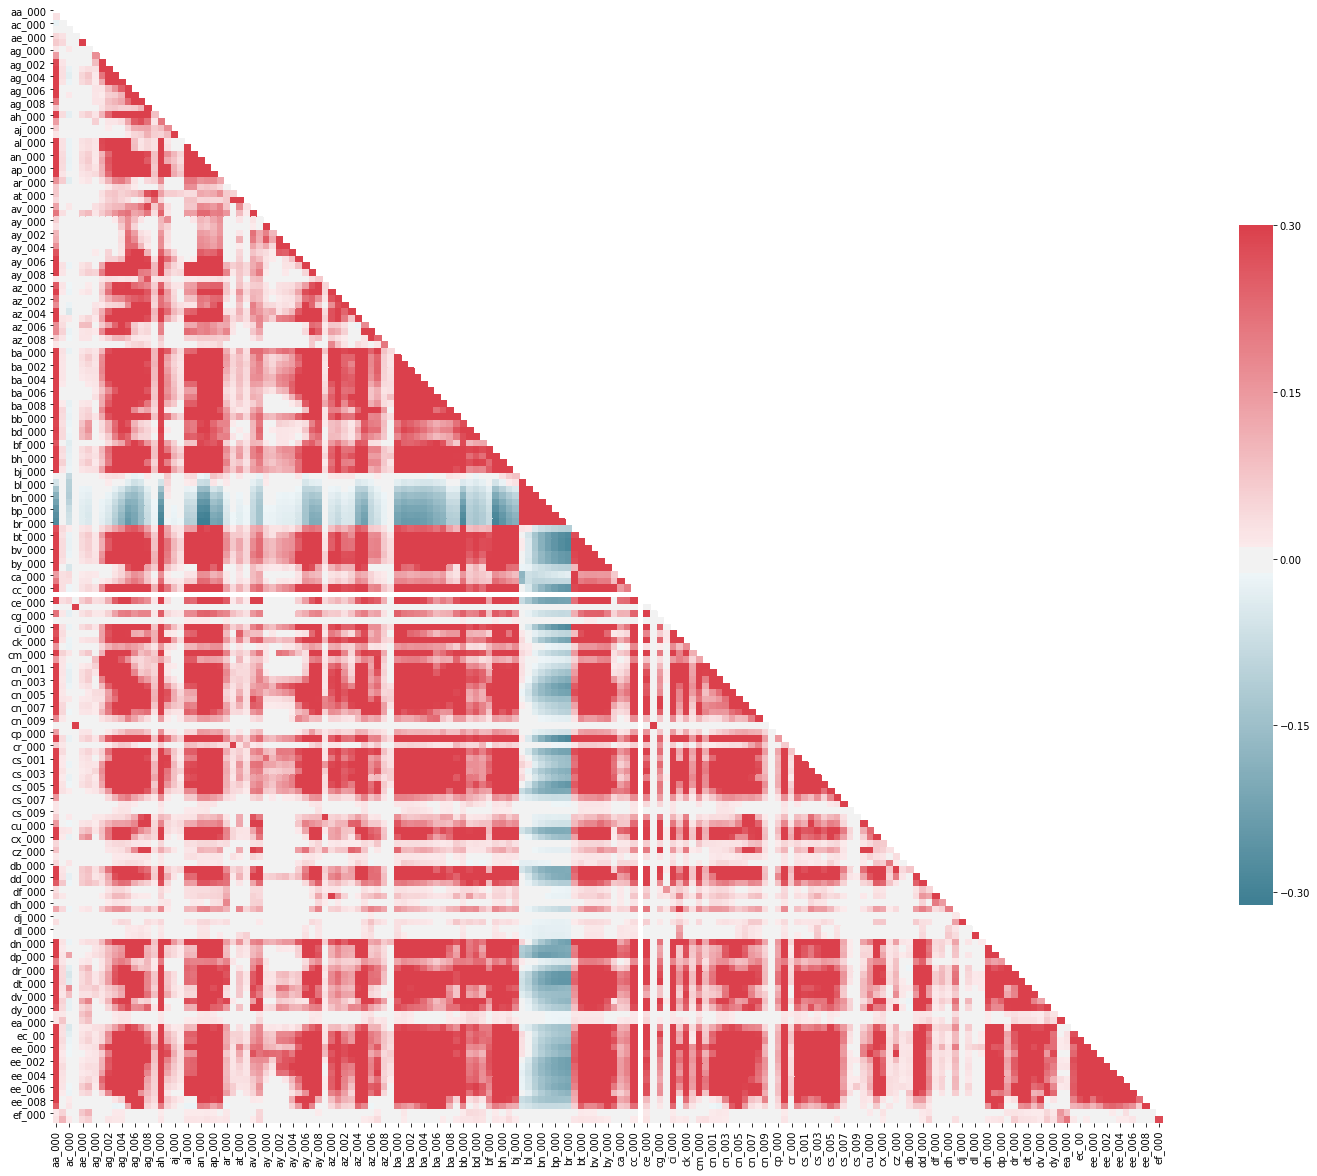

In [31]:
corr = i_X_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, cbar_kws={"shrink": .5})

In [33]:
sorted_cv = train_CV.sort_values(ascending = False)
sorted_cv

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
ay_001     52.233852
dz_000     49.002158
df_000     48.799015
cs_008     47.682310
ef_000     47.124953
aj_000     43.801822
eg_000     40.553250
ay_002     38.809580
dl_000     37.083676
ay_000     37.009562
dg_000     35.914418
ag_001     34.854950
dk_000     34.564625
cn_009     33.880675
dm_000     33.837616
ay_004     33.374716
ea_000     33.359880
             ...    
ag_006      2.344927
cn_005      2.331444
ab_000      2.328400
ah_000      2.300187
bg_000      2.297836
ds_000      2.268866
ao_000      2.260149
an_000      2.238797
ed_000      2.225825
ce_000      2.173284
ac_000      2.169767
dt_000      2.143945
cs_006      2.128478
do_000      2.099355
dp_000      1.959394
cs_000      1.871639
cv_000      1

In [36]:
import math
n = math.ceil(math.sqrt(170))
top_n = sorted_cv.head(n)
print(top_n)

cs_009    235.277605
cf_000    184.233092
co_000    183.949017
ad_000    183.847620
dh_000    114.984991
dj_000    109.647285
ag_000     91.878565
as_000     86.416904
ay_009     83.786063
az_009     76.967978
ak_000     74.526688
au_000     68.160554
ch_000     58.268229
ay_001     52.233852
dtype: float64


In [42]:
top_n=pd.DataFrame(top_n)
top_n_names=list(top_n.index.values)
top_n_names

['cs_009',
 'cf_000',
 'co_000',
 'ad_000',
 'dh_000',
 'dj_000',
 'ag_000',
 'as_000',
 'ay_009',
 'az_009',
 'ak_000',
 'au_000',
 'ch_000',
 'ay_001']

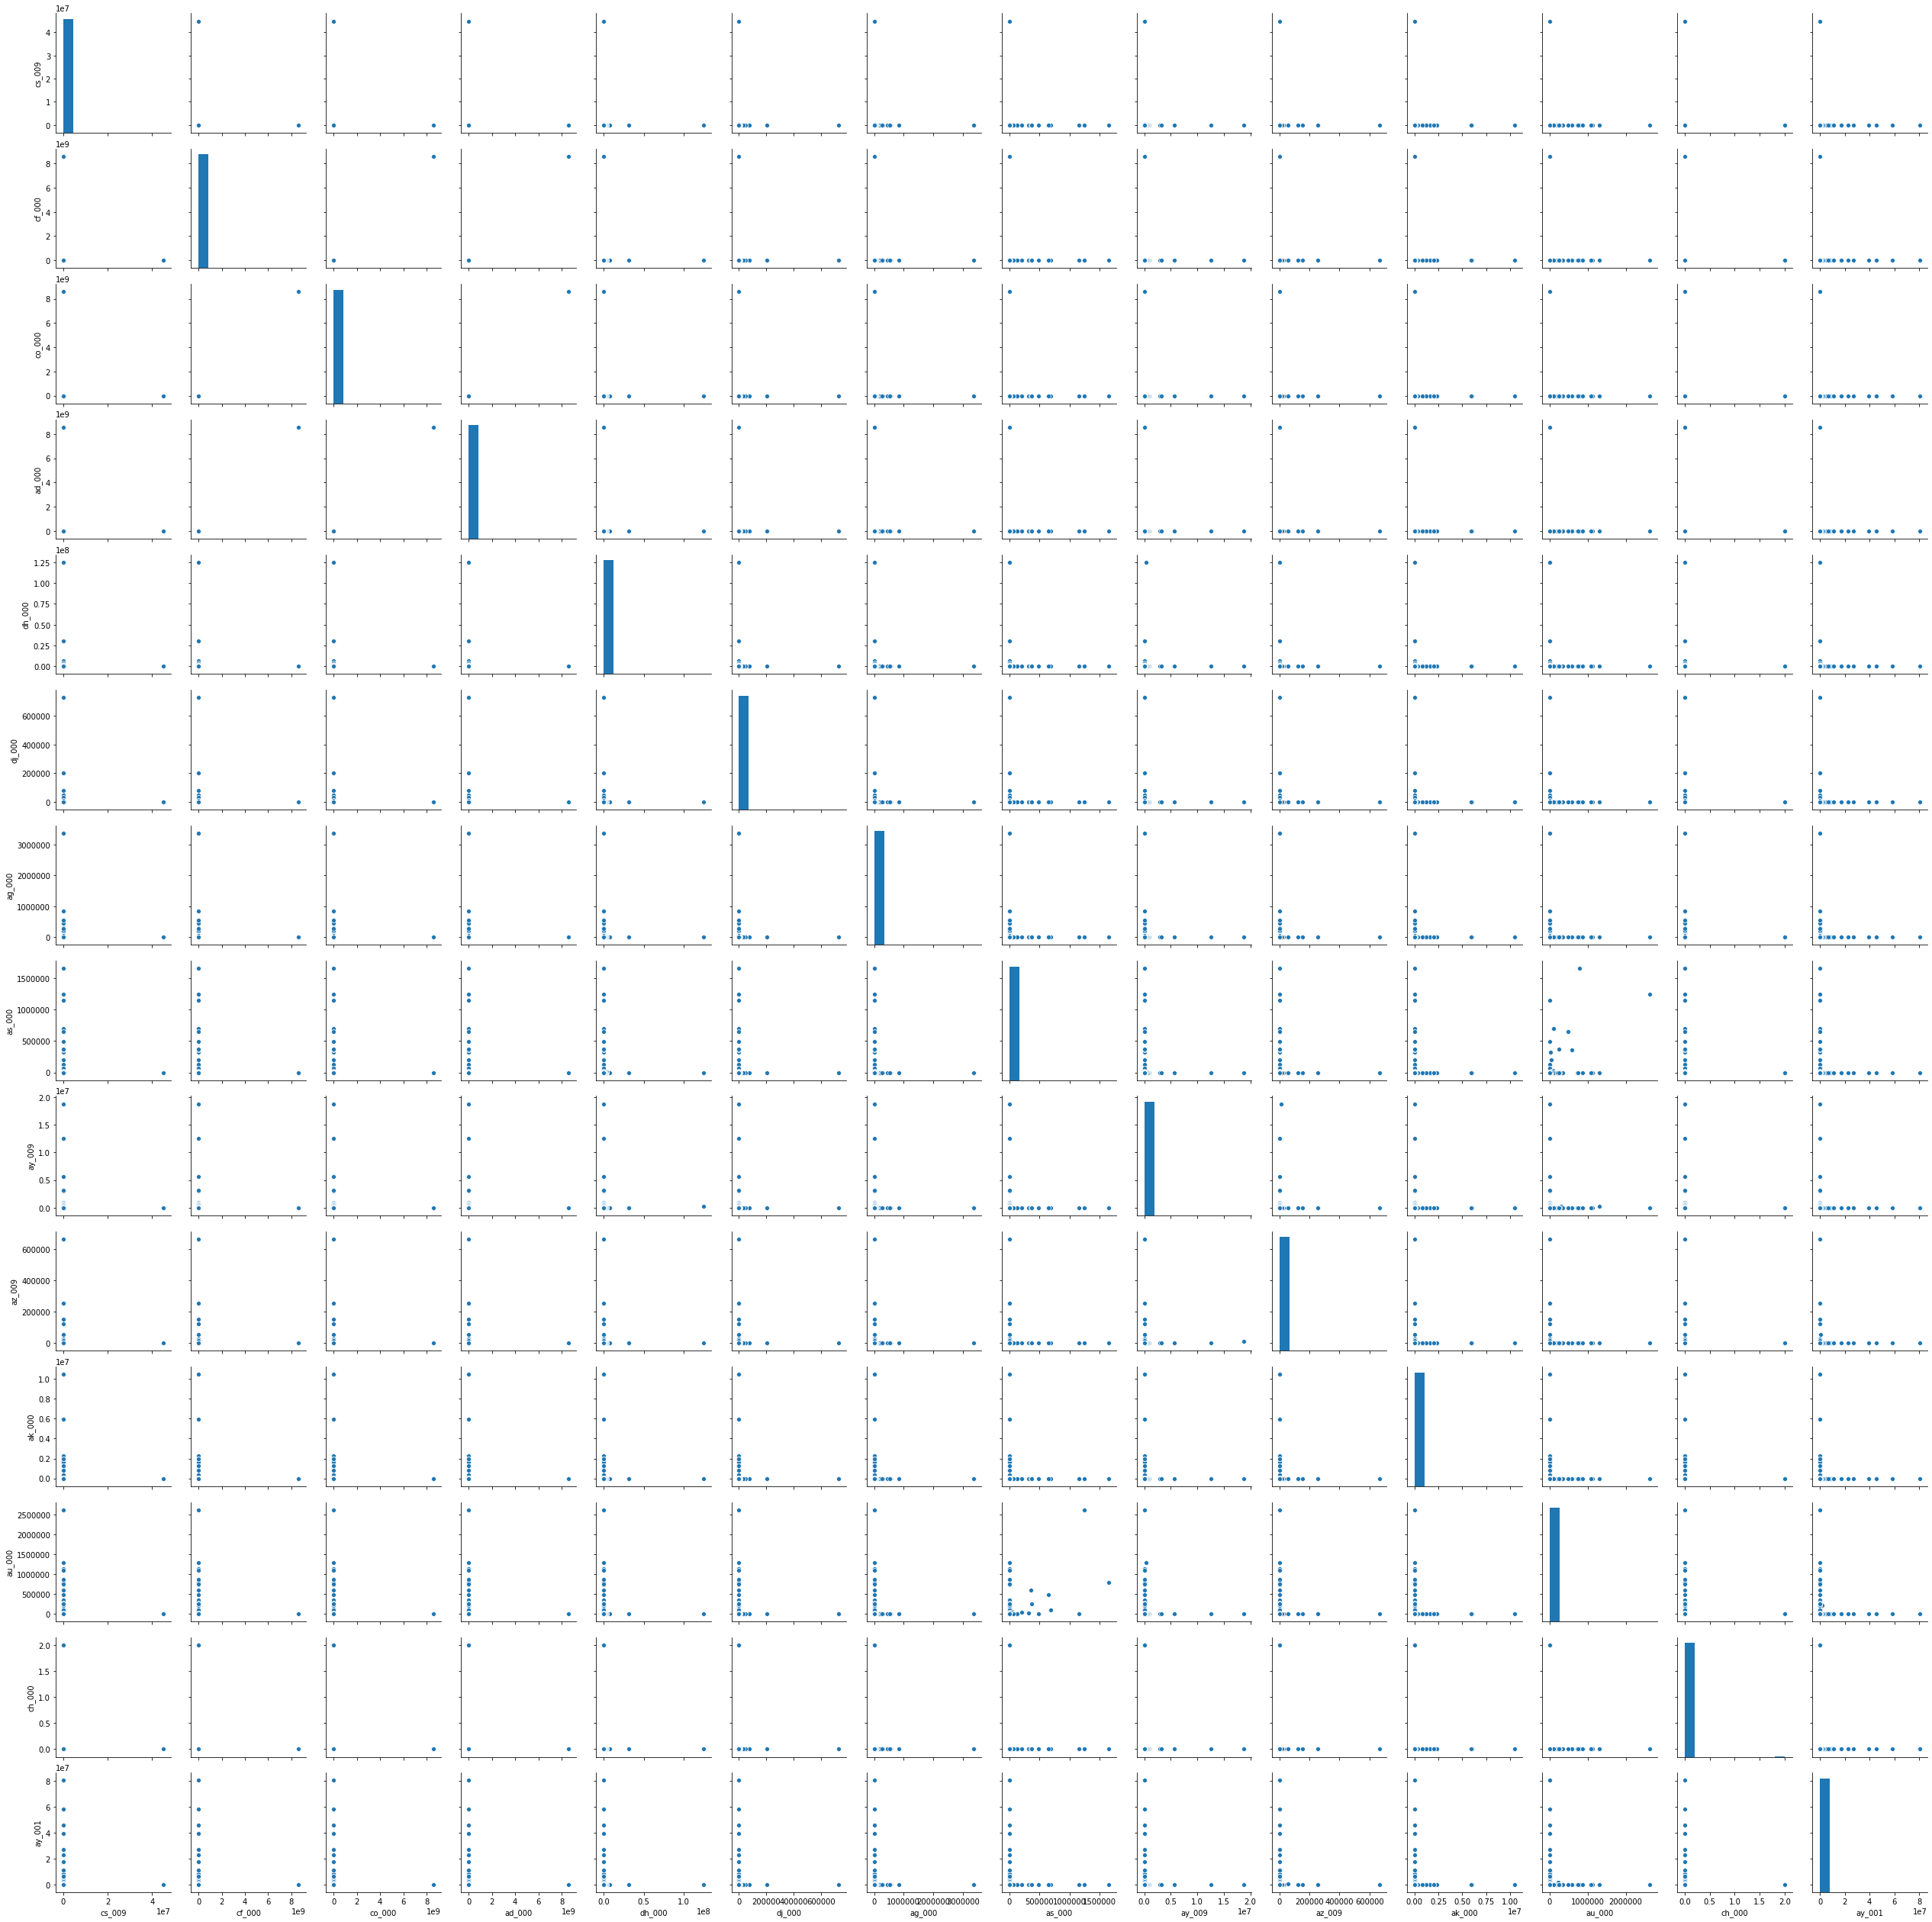

In [45]:
top_n_df = i_X_train[top_n_names]
sns.pairplot(top_n_df)

In [47]:
print(y_train.value_counts())
print(y_test.value_counts())

neg    59000
pos     1000
Name: class, dtype: int64
neg    15625
pos      375
Name: class, dtype: int64


These sets are pretty imbalanced from the very varse number of negative against positive

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)
clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, oob_score = True)
clf.fit(i_X_train, label_encoder.transform(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)